<a href="https://colab.research.google.com/github/rebeccalizaverghese/IBM-Data-Science/blob/main/7.4_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Model Development**
Model or Estimate can be thought of as a mathematical equation used to predict a value given one or more other values – relating one or more independent variables/ features to dependant variables. – usually, the more relevant data you have, the more accurate the model is.

Questions Answered:
1. Do i know if the dealer is offering fair value for my trade-in?
2. Do I know if I put a fair value on my car?


In [1]:
# Import Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
csv = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df= pd.read_csv(csv, header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#### Simple Linear Regression & Multiple Linear Regression
**Simple Linear Regression**: refers to use of one independent variable to made a prediction – It is a method that helps us to understand the relationship between two variables:
- the predictor/ independent variable (x)
- the target/ dependent variable (y)

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.
$$
Linear Function => yhat = a+bx
$$
where:
* (a) refers to the intercept of the regression line, i.e., value of y when x=0
* (b) refers to the slope of the regression line, i.e., the value with which y changes when x increases by 1 unit

In [4]:
# import linear model from scikit-learn
from sklearn.linear_model import LinearRegression
# Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [8]:
# Create linear function to find how 'highway-mpg' helps predict car price.
# define the predicator variable (x) and target variable(y).
x = df[['highway-mpg']]
y = df[['price']]
# Fit the linear model
lm.fit(x,y)
# Obtain prediction using 'predict' method
yhat = lm.predict(x)
yhat[0:5]


array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [21]:
# Value of intercept(a)
a = lm.intercept_
print("Intercept (a)= ", a)
# Value of slope(b)
b = lm.coef_
print("Slope (b)=", b)

# Verification
price = a+b*df[['highway-mpg']]
print(price[0:5])



Intercept (a)=  [38423.30585816]
Slope (b)= [[-821.73337832]]
    highway-mpg
0  16236.504643
1  16236.504643
2  17058.238022
3  13771.304508
4  20345.171535


In [26]:
# Exercise
lm1 = LinearRegression()
indep = df[['engine-size']]
dep = df[['price']]
lm1.fit(indep, dep)
yhat1 = lm1.predict(indep)
yhat1[0:3]


array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881]])

In [27]:
A = lm1.intercept_
B = lm1.coef_
print("Intercept =", A, "& Slope =", B)

#Verification
Price = A+B*df[['engine-size']]
print(Price[0:3])

Intercept = [-7963.33890628] & Slope = [[166.86001569]]
    engine-size
0  13728.463134
1  13728.463134
2  17399.383479


**Multiple Regression**: : refers to when multiple independent variables are used to make a prediction – It is used to explain the relationship between:
- one continuous/ dependent/ target (y) variable
- two or more predictor/ independent (x) variables.

Most of the real-world regression models involve multiple predictors.
The equation is given by:
$$
Linear Function =>
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$



In [43]:
# extract the 4 predictor variables and store them in variable(z)
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# fit/train the model
lm.fit(z,df['price'])
# Value of intercept
i = lm.intercept_
s = lm.coef_
print("Intercept = ", i)
print("Slope: \n b1= ",s[0], "\n b2= ",s[1], "\n b3= ",s[2], "\n b4= ",s[3])

Intercept =  -15806.62462632922
Slope: 
 b1=  53.49574422604914 
 b2=  4.707700994613939 
 b3=  81.53026382122758 
 b4=  36.05748881648596


In [59]:
price = i + s[0]*df['horsepower'] + s[1]*df['curb-weight'] + s[2]*df['engine-size'] + s[3]*df['highway-mpg']
print(price[0:3].rename("Price"))
Yhat = lm.predict(z)
print("Yhat: ", Yhat[0:3])

0    13699.111612
1    13699.111612
2    19051.654702
Name: Price, dtype: float64
Yhat:  [13699.11161184 13699.11161184 19051.65470233]


#### Model Evaluation using Visualization
**Regression Plot** is good estimate of the relationship between 2 variables, strength of correlation and direction of the relationship, i.e., positive or negative.

We can plot Regression Plot using the regplot method from the seaborn library
* the horizontal axis is the independent variable
* the vertical axis is the dependant variable

Each point represents a different target point and the fitted line represents the predicted values.

(0.0, 48180.67284058677)

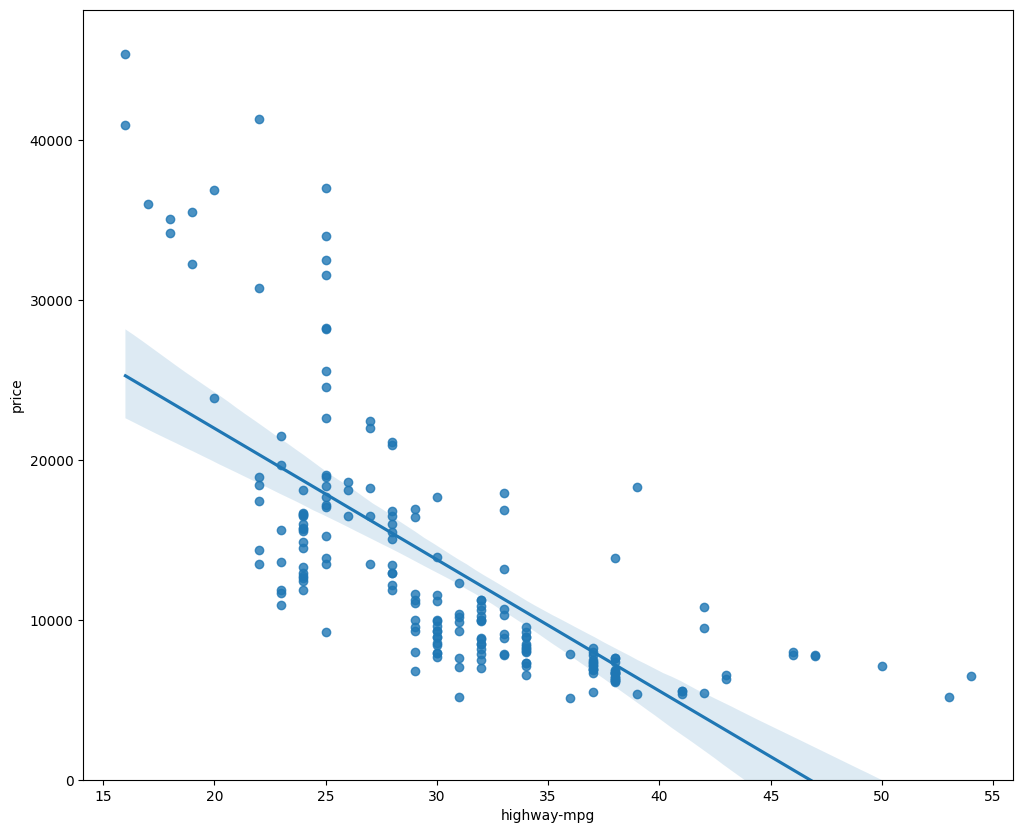

In [54]:
# Using regplot from seaborn library
# Regression Plot of 'highway-mpg' and 'price'
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0, )

Interpretation: We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

Note: One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

(0.0, 47414.1)

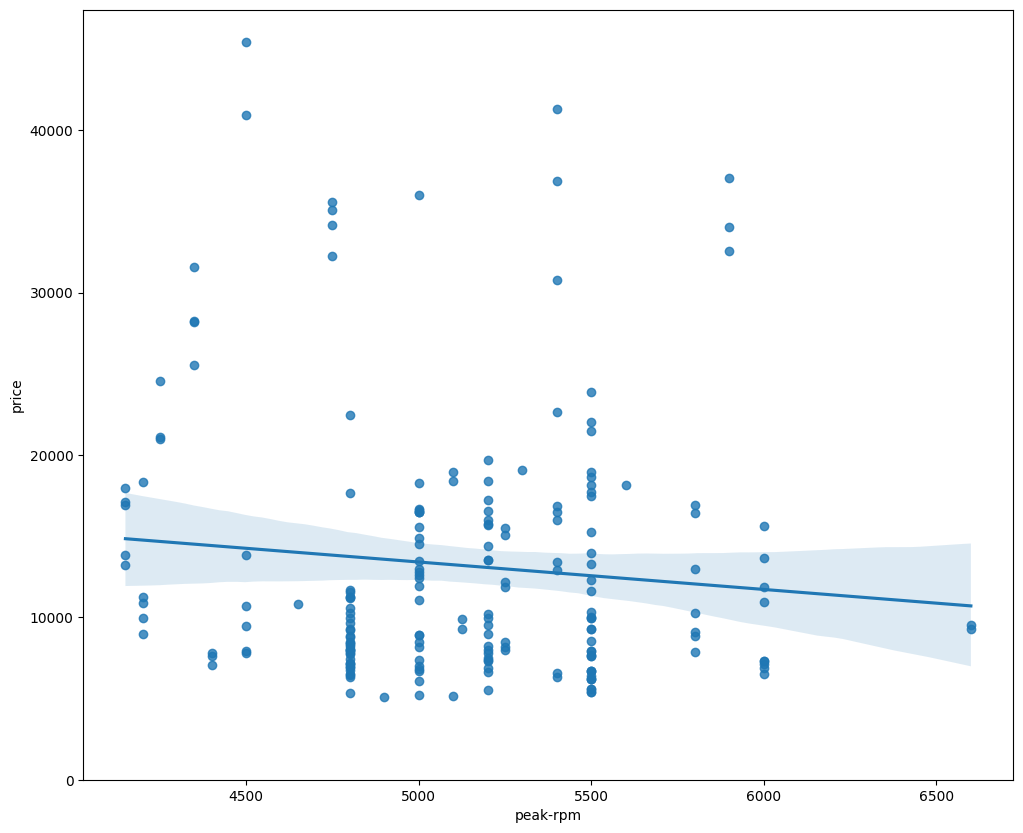

In [56]:
# Regression Plot of 'peak-rpm' and 'price'
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0, )

Interpretation: Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

In [57]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


**Residual Plot**

Residual: The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

Residual Plot: A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

We can plot a Residual Plot using the residplot method from the seaborn library

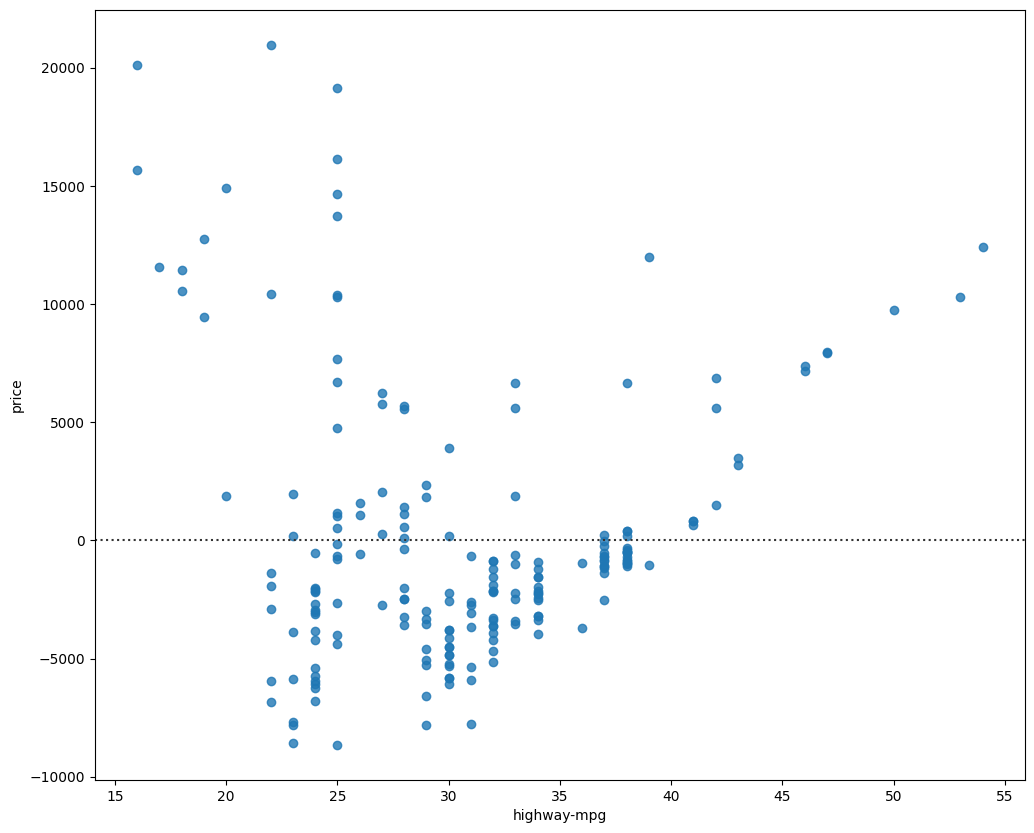

In [58]:
# Residual Plot of 'highway-mpg' and 'price'
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

Interpretation: We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

**Distribution Plot**
It counts the predicted value versus the actual value and are extremely useful for visualising models with more than one independent variable/ feature, i.e., for multiple linear regression.

We use distplot method from sns to create a distribution plot


<ipython-input-60-d43a562c0ca2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-60-d43a562c0ca2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" ,

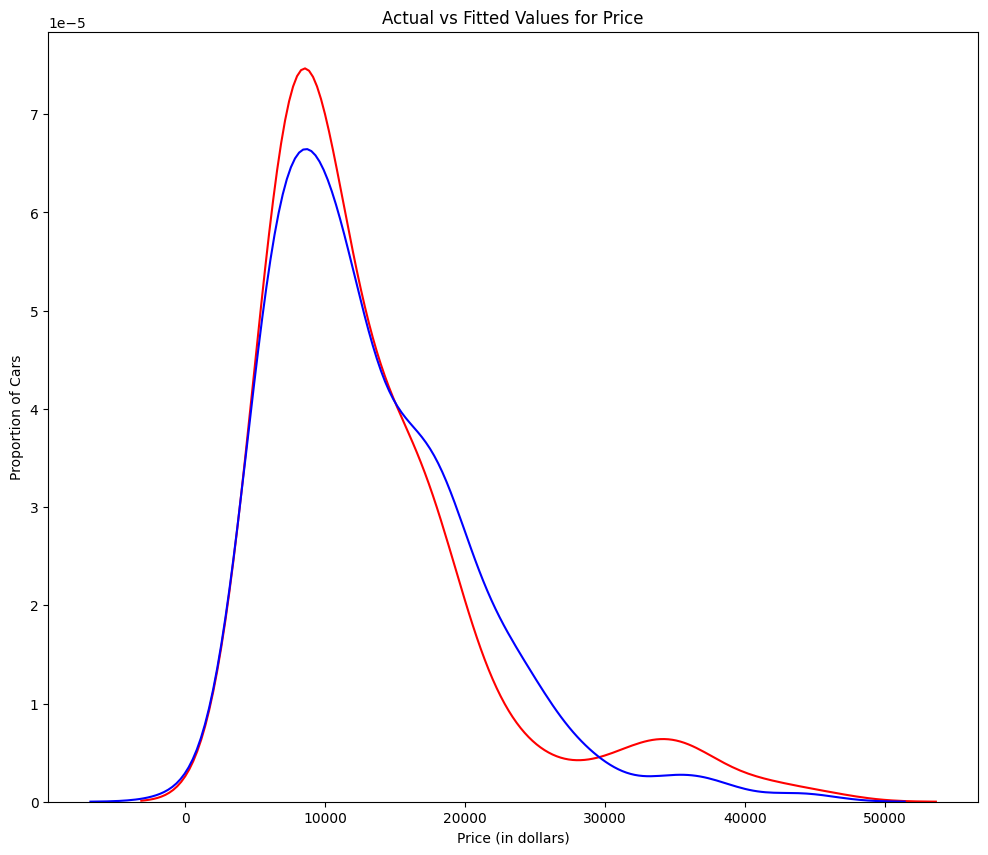

In [60]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Interpretation: We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

#### Polynomial Regression and Pipelines
**Polynomial Regression** is a special case of general linear regression and is beneficial for describing curvilinear relationships {which is the result of squaring or setting higher-order terms of the predictor variables in the model transforming the data}

There are different orders of polynomial regression:
<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2
$$


<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\
$$


<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\
$$


In [62]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


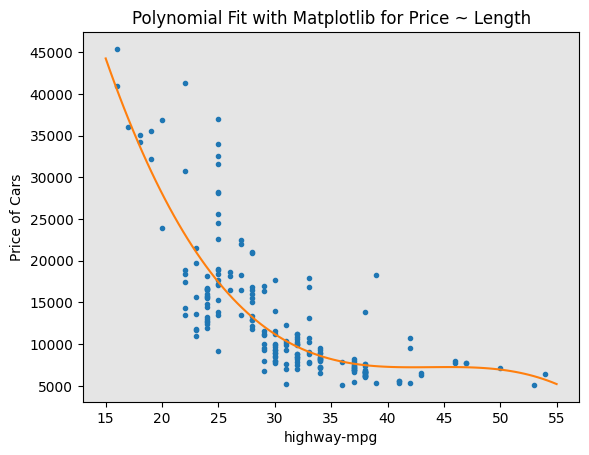

In [63]:
PlotPolly(p, x, y, 'highway-mpg')

In [64]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [68]:
# Performing polynomial transform on multiple features
# Import module
from sklearn.preprocessing import PolynomialFeatures
# Create a PolynomialFeatures object of degree 2
pr=PolynomialFeatures(degree=2)
pr
z_pr=pr.fit_transform(z)
print("Original, i.e., before transformation:", z.shape)
print("After transformation:", z_pr.shape)

Original, i.e., before transformation: (201, 4)
After transformation: (201, 15)


**Pipelines** simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# We input the list as an argument to the pipeline constructor:
pipe = Pipeline(Input)
pipe


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [70]:
Z = z.astype(float)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

#### Measures for In-Sample Evaluation
It is a measure to determine how close the data is to the fitted regression line/ how close our actual data is to our estimated model – can be considered as comparing a regression model to a simple model, i.e., the mean of the data points – if variable x is a good predictor, our model should perform much better than just the mean.

Measures:
- R^2/ R-squared - also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.
- Mean Squared Error (MSE) - The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

In [75]:
# Simple Linear regression
# R-squared
x=df[['highway-mpg']]
y=df[['price']]
lm.fit(x,y)
yhat = lm.predict
print("R^2 =", lm.score(x,y))


R^2 = 0.4965911884339176


In [74]:
# MSE
# import the function mean_squared_error from the module metrics:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], yhat)
print('The mean square error of price and predicted value is: ', mse)


The mean square error of price and predicted value is:  31635042.944639888


In [76]:
# Multiple Linear Regression
# R^2
lm.fit(z,df['price'])
print("R^2 =", lm.score(z, df['price']))

R^2 = 0.8093562806577457


In [77]:
# MSE
Yhat = lm.predict(Z)
print('The mean square error of price and predicted value is: ',\
      mean_squared_error(df['price'], Yhat))

The mean square error of price and predicted value is:  11980366.87072649


In [78]:
# Polynomial Fit
# import the function r2_score from the module metrics
from sklearn.metrics import r2_score
# apply the function to get the value of R^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [79]:
# MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

#### Prediction & Decision Making

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


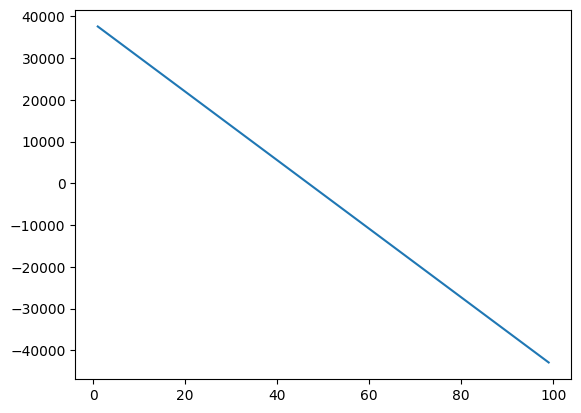

In [80]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(x,y)
lm
yhat=lm.predict(new_input)
yhat[0:5]
plt.plot(new_input, yhat)
plt.show()